# Machine learning examples from Mastering Machine Learning with scikit-learn book

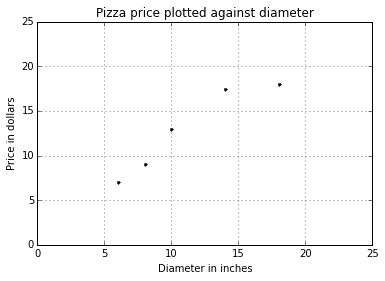

In [1]:
# Chapter 2: Linear regression

# Pizza price example
import matplotlib.pyplot as plt
%matplotlib inline

# Data
X = [[6], [8], [10], [14], [18]] # diameter in inches
y = [[7], [9], [13], [17.5], [18]] # price in dollars

# Plot the data
plt.figure()
plt.title("Pizza price plotted against diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(X, y, "k.")
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [2]:
# Train and fit the model using linear regression
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict price for a 12 inches pizza
print("A 12 inches pizza should cost: ${:.2f}".format(model.predict([12])[0][0]))

A 12 inches pizza should cost: $13.68


/home/alex/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [6]:
# Compute the residual sum of squares for our model
import numpy as np
residual = np.mean((model.predict(X) - y) ** 2)
print("Residual sum of squares is: {:.2f}".format(residual))

Residual sum of squares is: 1.75


In [9]:
# Computer R-squared value
X_test = [[8], [9], [11], [16], [12]]
Y_test = [[11], [8.5], [15], [18], [11]]
Rsquared = model.score(X_test, Y_test)
print("R-squared value is: {:.4f}".format(Rsquared))

R-squared value is: 0.6620


In [14]:
# Multiple linear regression using more data
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model_multiple = LinearRegression()
model_multiple.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model_multiple.predict(X_test)
for i, prediction in enumerate(predictions):
    print("Predicted: {}, Target: {}".format(prediction, y_test[i]))
print("R-squared value is: {:.4f}".format(model_multiple.score(X_test, y_test)))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]
R-squared value is: 0.7702
